# Importing packages

In [113]:
import os
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn import svm
import seaborn as sb
import pandas as pd

from sklearn.svm import LinearSVC as SVC
import matplotlib as mpl
import matplotlib.pyplot as plt

import plotly as ply

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Loading data set

In [38]:
a_data=pd.read_csv("a_data.csv")
a_data.head()

,Gender,AgeM,ECV,TPP,SC,TympPoF,OAE1,OAE1.4,OAE2,OAE2.8,...,f.6168.8433.,f.6349.6042.,f.6535.6618.,f.6727.1713.,f.6924.2925.,f.7127.1897.,f.7336.0323.,f.7550.9945.,f.7772.2555.,f.8000.0000.
0,0,112,1.08,0,0.52,1,3.0,10.0,18.0,14.0,...,0.5370,0.4869,0.4301,0.4080,0.3804,0.3291,0.2951,0.2530,0.2282,0.2003
1,0,114,1.28,0,1.28,0,7.0,4.0,9.0,5.0,...,0.2636,0.2578,0.2443,0.2549,0.2604,0.2397,0.2299,0.2048,0.1917,0.1659
2,1,118,1.26,0,0.87,0,9.0,12.0,8.0,12.0,...,0.4269,0.4142,0.3910,0.3799,0.3740,0.3536,0.3473,0.3237,0.3056,0.2881
3,0,119,0.64,0,0.60,0,13.0,9.0,13.0,11.0,...,0.0077,0.0123,0.0066,0.0000,0.0126,0.0231,0.0405,0.0401,0.0391,0.0258
4,0,95,0.92,0,1.65,0,7.0,0.0,2.0,12.0,...,0.2332,0.2216,0.2228,0.2653,0.2596,0.2576,0.2838,0.3598,0.3953,0.3642


In [10]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris virginica
svm_clf = Pipeline([
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [11]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

Saving figure higher_dimensions_plot


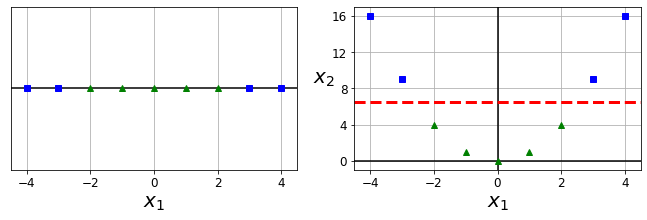

In [17]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

In [51]:
a_data.head()
for i in a_data.columns:
    print(i)


Gender
AgeM
ECV
TPP
SC
TympPoF
OAE1
OAE1.4
OAE2
OAE2.8
OAE4
OAEPoF
OverallPoF
EarSide
f.226.0000.
f.257.3256.
f.280.6155.
f.297.3018.
f.324.2099.
f.343.4884.
f.363.9133.
f.385.5527.
f.408.4789.
f.432.7683.
f.458.5020.
f.471.9372.
f.500.0000.
f.514.6511.
f.545.2539.
f.561.2310.
f.577.6763.
f.594.6036.
f.629.9605.
f.648.4198.
f.667.4199.
f.686.9768.
f.707.1068.
f.727.8266.
f.749.1535.
f.771.1054.
f.793.7005.
f.816.9577.
f.840.8964.
f.865.5366.
f.890.8987.
f.917.0040.
f.943.8743.
f.971.5319.
f.1000.0000.
f.1029.3022.
f.1059.4631.
f.1090.5077.
f.1122.4620.
f.1155.3527.
f.1189.2071.
f.1224.0535.
f.1259.9210.
f.1296.8396.
f.1334.8399.
f.1373.9536.
f.1414.2136.
f.1455.6532.
f.1498.3071.
f.1542.2108.
f.1587.4011.
f.1633.9155.
f.1681.7928.
f.1731.0731.
f.1781.7974.
f.1834.0081.
f.1887.7486.
f.1943.0639.
f.2000.0000.
f.2058.6045.
f.2118.9262.
f.2181.0155.
f.2244.9241.
f.2310.7054.
f.2378.4142.
f.2448.1071.
f.2519.8421.
f.2593.6791.
f.2669.6797.
f.2747.9073.
f.2828.4271.
f.2911.3064.
f.2996.6142.

In [52]:
a_data.columns.get_loc("EarSide")

13

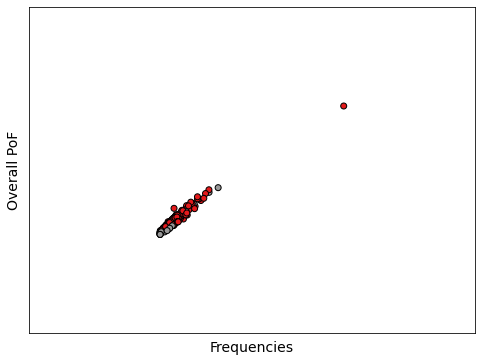

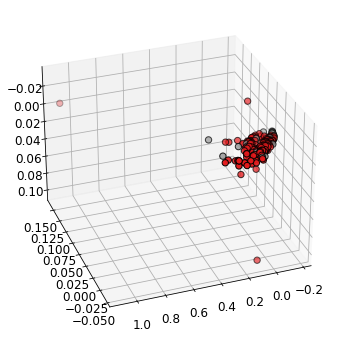

In [98]:
xtrain_a=a_data.iloc[:,[14,15,16,17]]
xtrain_a=xtrain_a.to_numpy()
type(xtrain_a)

ytrain_a=a_data.iloc[:,[12]]
ytrain_a=ytrain_a.to_numpy()

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with

X = xtrain_a
y = ytrain_a

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Frequencies")
plt.ylabel("Overall PoF")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(xtrain_a)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

# # ax.set_title("First three PCA directions")
# # ax.set_xlabel("1st eigenvector")
# # ax.w_xaxis.set_ticklabels([])
# # ax.set_ylabel("2nd eigenvector")
# # ax.w_yaxis.set_ticklabels([])
# # ax.set_zlabel("3rd eigenvector")
# # ax.w_zaxis.set_ticklabels([])

# plt.show()

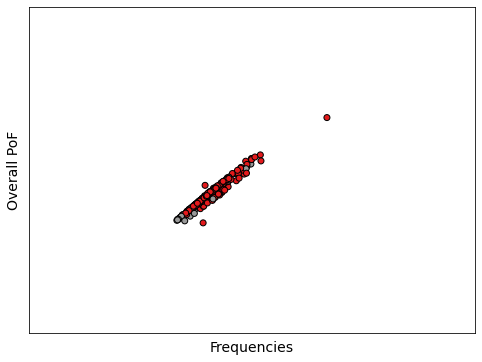

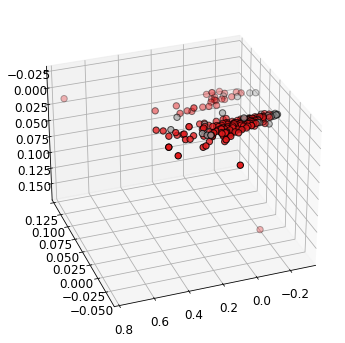

In [100]:
xtrain_a=a_data.iloc[:,20:25]
xtrain_a=xtrain_a.to_numpy()
type(xtrain_a)

ytrain_a=a_data.iloc[:,[12]]
ytrain_a=ytrain_a.to_numpy()

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with

X = xtrain_a
y = ytrain_a

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Frequencies")
plt.ylabel("Overall PoF")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(xtrain_a)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

# # ax.set_title("First three PCA directions")
# # ax.set_xlabel("1st eigenvector")
# # ax.w_xaxis.set_ticklabels([])
# # ax.set_ylabel("2nd eigenvector")
# # ax.w_yaxis.set_ticklabels([])
# # ax.set_zlabel("3rd eigenvector")
# # ax.w_zaxis.set_ticklabels([])

# plt.show()

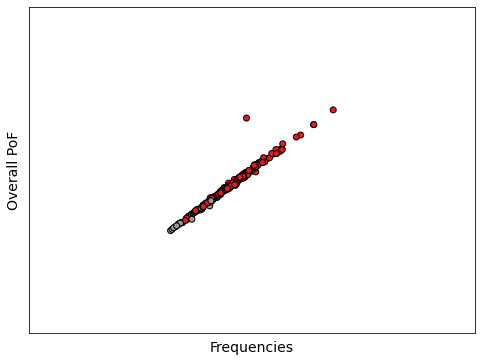

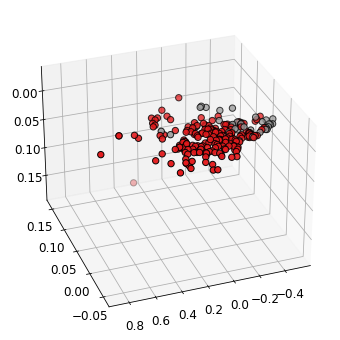

In [101]:
xtrain_a=a_data.iloc[:,30:35]
xtrain_a=xtrain_a.to_numpy()
type(xtrain_a)

ytrain_a=a_data.iloc[:,[12]]
ytrain_a=ytrain_a.to_numpy()

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with

X = xtrain_a
y = ytrain_a

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Frequencies")
plt.ylabel("Overall PoF")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(xtrain_a)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

# # ax.set_title("First three PCA directions")
# # ax.set_xlabel("1st eigenvector")
# # ax.w_xaxis.set_ticklabels([])
# # ax.set_ylabel("2nd eigenvector")
# # ax.w_yaxis.set_ticklabels([])
# # ax.set_zlabel("3rd eigenvector")
# # ax.w_zaxis.set_ticklabels([])

# plt.show()

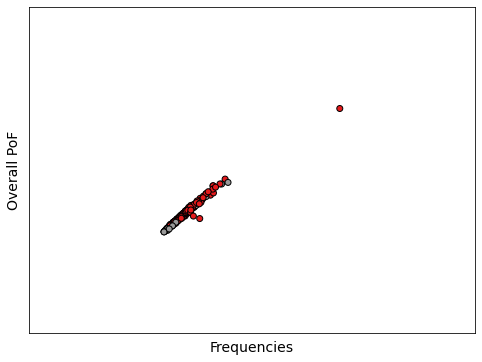

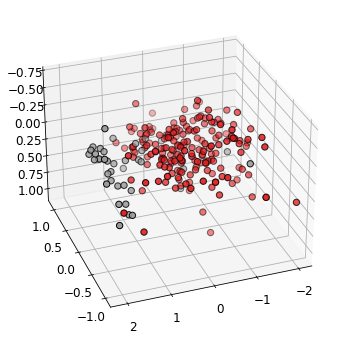

In [112]:
xtrain_a=a_data.iloc[:,15:70]
xtrain_a=xtrain_a.to_numpy()
type(xtrain_a)

ytrain_a=a_data.iloc[:,[12]]
ytrain_a=ytrain_a.to_numpy()

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with

X = xtrain_a
y = ytrain_a

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Frequencies")
plt.ylabel("Overall PoF")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(xtrain_a)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

# # ax.set_title("First three PCA directions")
# # ax.set_xlabel("1st eigenvector")
# # ax.w_xaxis.set_ticklabels([])
# # ax.set_ylabel("2nd eigenvector")
# # ax.w_yaxis.set_ticklabels([])
# # ax.set_zlabel("3rd eigenvector")
# # ax.w_zaxis.set_ticklabels([])

# plt.show()

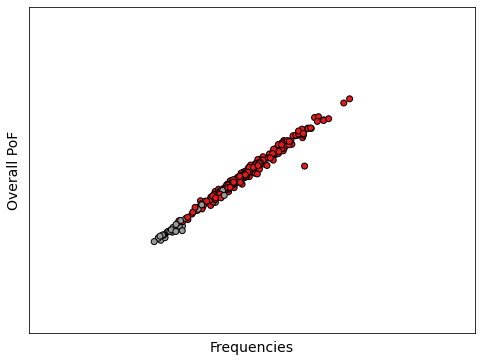

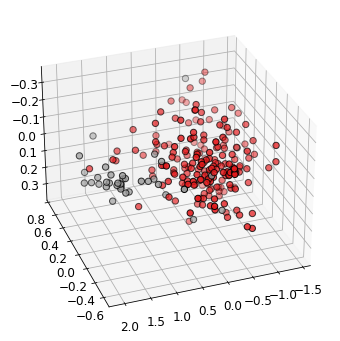

In [106]:
xtrain_a=a_data.iloc[:,50:70]
xtrain_a=xtrain_a.to_numpy()
type(xtrain_a)

ytrain_a=a_data.iloc[:,[12]]
ytrain_a=ytrain_a.to_numpy()

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with

X = xtrain_a
y = ytrain_a

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Frequencies")
plt.ylabel("Overall PoF")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(xtrain_a)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

# # ax.set_title("First three PCA directions")
# # ax.set_xlabel("1st eigenvector")
# # ax.w_xaxis.set_ticklabels([])
# # ax.set_ylabel("2nd eigenvector")
# # ax.w_yaxis.set_ticklabels([])
# # ax.set_zlabel("3rd eigenvector")
# # ax.w_zaxis.set_ticklabels([])

# plt.show()



ModuleNotFoundError: No module named 'plotly'

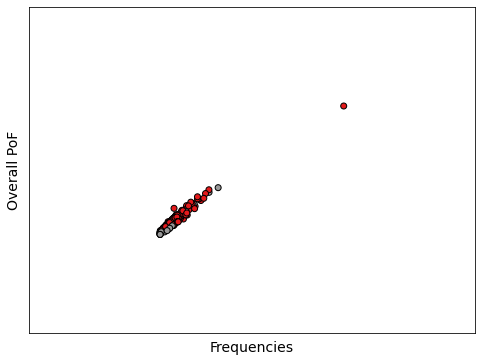

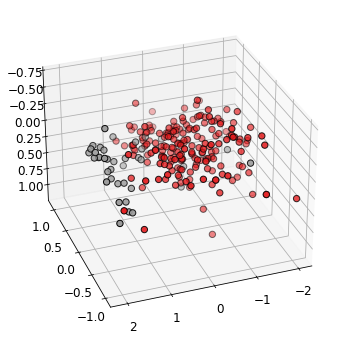

In [110]:
xtrain_a=a_data.iloc[:,14:70]
xtrain_a=xtrain_a.to_numpy()
type(xtrain_a)

ytrain_a=a_data.iloc[:,[12]]
ytrain_a=ytrain_a.to_numpy()

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with

X = xtrain_a
y = ytrain_a

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Frequencies")
plt.ylabel("Overall PoF")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(xtrain_a)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

# # ax.set_title("First three PCA directions")
# # ax.set_xlabel("1st eigenvector")
# # ax.w_xaxis.set_ticklabels([])
# # ax.set_ylabel("2nd eigenvector")
# # ax.w_yaxis.set_ticklabels([])
# # ax.set_zlabel("3rd eigenvector")
# # ax.w_zaxis.set_ticklabels([])

# plt.show()

import plotly.express as px
df = px.X_reduced
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

In [109]:
X_reduced

array([[ 1.66328610e+00,  8.36608085e-02, -4.45278187e-02],
       [ 6.11331570e-02,  1.16640289e-01,  5.93475387e-02],
       [-2.08007669e-01,  3.59607440e-03, -1.31390211e-01],
       [-5.65338228e-01,  3.56340831e-01,  6.61622355e-02],
       [-5.25506899e-01,  7.35547114e-01, -2.22206041e-01],
       [ 1.52839520e+00, -3.75086143e-02,  1.03531088e-02],
       [-8.13448122e-01, -4.33759486e-02, -1.61169640e-01],
       [-7.59014647e-01,  1.39773992e-01,  1.36189472e-01],
       [ 1.12433899e+00, -3.23949052e-02,  1.70481349e-01],
       [ 9.43949816e-02,  2.90696319e-01, -1.70558497e-01],
       [ 1.84910197e+00,  2.49142487e-01,  1.65085911e-02],
       [ 1.29112335e+00,  2.91058197e-01,  1.50632707e-02],
       [ 2.34869148e-01, -1.39977885e-02,  8.94884154e-02],
       [ 6.04551337e-01,  1.66229994e-01, -2.09841493e-01],
       [ 4.22601556e-01,  2.51903359e-01, -2.36559137e-01],
       [ 1.86044055e-01, -6.24917647e-01, -8.18218726e-03],
       [-1.26382116e+00,  2.14479001e-01